In [1]:
import os
import configparser
import pandas as pd
import re
import openpyxl
from nltk import word_tokenize, sent_tokenize, FreqDist


In [14]:
df = pd.read_csv('data/twitter_data_clean_final.csv')
df = df.loc[:,["user_id","tokens","state","region"]]
df.dropna(inplace=True)
df

,user_id,tokens,state,region
0,1.180000e+18,nerdy guy love art music wrestle comics poly,OH,Midwest
1,1.440000e+18,worry lil sunshine cause mess woman moon civil...,PA,Northeast
2,1.219720e+08,huge sport music fan graduate regis university...,CO,West
3,1.390000e+18,endorse government entity project guarantee wa...,WA,West
4,2.349053e+07,writer cult film fanatic love politics,UT,West
...,...,...,...,...
1723,2.961228e+08,christian husband father candidate mosquito re...,OH,Midwest
1724,8.800000e+17,martech mba foodie bilingual soccer box gamer ...,CA,West
1725,1.153059e+09,stream occasionally choose race cars important...,KY,South
1726,2.432869e+08,enjoy practical wisdom daily life promote trut...,AZ,Southwest


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

most_used = 5000 # Most used 5000 words in bios
cv = CountVectorizer(max_features=most_used,stop_words='english') 

In [18]:
sparce_matrix = cv.fit_transform(df['tokens']).toarray()
sparce_matrix[2]

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tokens'])

X

<1644x5184 sparse matrix of type '<class 'numpy.float64'>'
	with 12087 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.cluster import KMeans

true_k = 17
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind])

Cluster 0:
 love
 fan
 host
 time
 founder
 account
 owner
 coach
 god
 old
Cluster 1:
 artist
 know
 follow
 new
 gamer
 twitter
 person
 funny
 page
 love
Cluster 2:
 book
 insta
 link
 bio
 click
 snap
 com
 year
 old
 major
Cluster 3:
 star
 twitch
 san
 view
 nerd
 affiliate
 war
 francisco
 streamer
 diego
Cluster 4:
 band
 hit
 focus
 events
 freak
 podcast
 rock
 inquire
 mix
 stream
Cluster 5:
 raise
 nyc
 bear
 big
 chicago
 roof
 ghost
 philly
 institute
 advocate
Cluster 6:
 life
 tweet
 mom
 enjoy
 game
 build
 help
 light
 writer
 democrat
Cluster 7:
 instagram
 model
 tiktok
 follow
 choreographer
 shabooty
 shortysavage
 dancer
 visual
 stylist
Cluster 8:
 post
 open
 bartender
 sexual
 dms
 mind
 business
 gym
 demi
 devil
Cluster 9:
 like
 let
 bless
 run
 love
 follow
 people
 niggas
 tweet
 everyday
Cluster 10:
 unmonitored
 develop
 syndication
 contact
 national
 office
 weather
 service
 grand
 crosse
Cluster 11:
 live
 matter
 black
 long
 life
 love
 learn
 bre

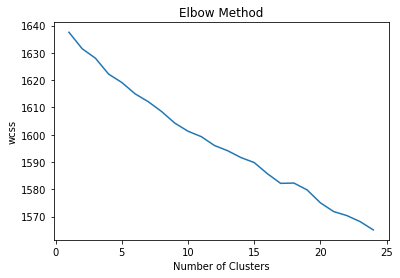

In [35]:
import matplotlib.pyplot as plt

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()